#### This notebook estimates damage ratio and repair cost for buildings using damage outcomes from Hurricane Damage Simulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
dmg=pd.read_csv('sample_data.csv')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
np.random.seed(1234)

In [3]:
dmg.head(1)

,id,x,y,idt,taxval,landuse,yearbuilt,storey,Str_old,Structures,type,Area_ft2,o_mph,o_DS1,o_DS2,o_DS3,o_DS4,o_dmg
0,64590,-77.211,34.669,37754,131940,Residential,2004,1,Single Family,Single Family,A58,2219.860665,146.74,0.968,0.765,0.552,0.501,4


#### Damage Ratio Estimation Based on Proposed Model

In [4]:
DR=list()
for index, row in dmg.iterrows():
    state = row['o_dmg']
    taxv= row['taxval']
    if state==1:
        dr=(np.random.normal(0.02, 0.001, 1)).mean()
    elif state==2:
        dr=(np.random.normal(0.10, 0.005, 1)).mean()
    elif state==3:
        dr=(np.random.normal(0.50, 0.025, 1)).mean()
    elif state==4:
        e=(np.random.normal(1.00, 0.050, 1)).mean()
        if e>1.0:
            dr=1.0
        else:
            dr=e
    else:
        dr=0
    dr
    DR.append(dr)

#### Repair Cost Estimation Based on Proposed Model

In [5]:
RCost=list()
for index, row in dmg.iterrows():
    state = row['o_dmg']
    taxv= row['taxval']
    if state==1:
        cost=(np.random.normal(0.02, 0.001, 1)).mean()*taxv
    elif state==2:
        cost=(np.random.normal(0.10, 0.005, 1)).mean()*taxv
    elif state==3:
        cost=(np.random.normal(0.50, 0.025, 1)).mean()*taxv
    elif state==4:
        e=(np.random.normal(1.00, 0.050, 1)).mean()
        if e>1.0:
            cost=1.0*taxv
        else:
            cost=e*taxv
    else:
        cost=0*taxv
    cost
    RCost.append(cost)

In [6]:
#Total Cost in Millon $USD
sum(RCost)/1000000

114.76487922560773

In [7]:
# Creating Pandas DataFrame with Damage Ratio and Repair 
ID=list(dmg.id)
DR= list(DR)
RCost= list(RCost)
pd_new = {'id_new':ID,'DRatio':DR, 'R_Cost':RCost}
df=pd.DataFrame(pd_new)

In [8]:
df.head()

,id_new,DRatio,R_Cost
0,64590,1.000000,131940.000000
1,120592,0.094045,12101.434082
2,89645,1.000000,473785.799254
3,47967,0.019687,3300.221655
4,47972,0.019279,3450.579906


In [9]:
Dmg_New=dmg.merge(df, left_on='id', right_on='id_new')

In [10]:
Dmg_New.head()

,id,x,y,idt,taxval,landuse,yearbuilt,storey,Str_old,Structures,...,Area_ft2,o_mph,o_DS1,o_DS2,o_DS3,o_DS4,o_dmg,id_new,DRatio,R_Cost
0,64590,-77.211,34.669,37754,131940,Residential,2004,1,Single Family,Single Family,...,2219.860665,146.74,0.968,0.765,0.552,0.501,4,64590,1.000000,131940.000000
1,120592,-77.374,34.768,45542,133340,Residential,1988,1,Single Family,Single Family,...,2783.299933,134.30,0.837,0.394,0.112,0.065,2,120592,0.094045,12101.434082
2,89645,-77.160,34.682,53669,492240,Waterfront River/Creek,2001,1,Single Family,Single Family,...,3483.491410,147.42,0.946,0.682,0.364,0.286,4,89645,1.000000,473785.799254
3,47967,-77.444,34.800,68961,167250,Residential,2007,1,Single Family,Single Family,...,2672.812928,129.69,0.756,0.276,0.065,0.051,1,47967,0.019687,3300.221655
4,47972,-77.444,34.800,68961,167250,Residential,2007,1,Single Family,Single Family,...,2623.873118,129.68,0.756,0.276,0.065,0.051,1,47972,0.019279,3450.579906


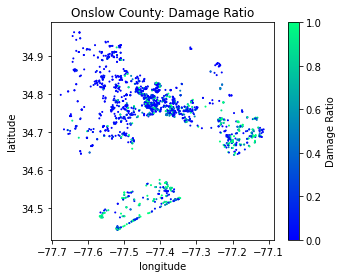

In [11]:
#Plot Damage Ratio
x = Dmg_New.x*1
y = Dmg_New.y
fig = plt.figure(figsize=(5,4))
plt.scatter(x, y, c=Dmg_New.DRatio, s=1)
plt.winter()
plt.colorbar(label='Damage Ratio')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Onslow County: Damage Ratio');
plt.show()

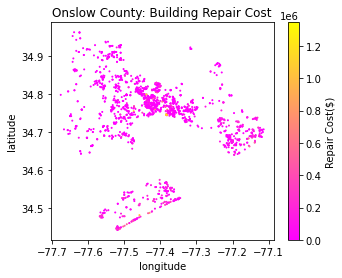

In [12]:
#Plot Repair Cost for Buildings
import numpy as np
import matplotlib.pyplot as plt
x = Dmg_New.x*1
y = Dmg_New.y
fig = plt.figure(figsize=(5,4))
plt.scatter(x, y, c=Dmg_New.R_Cost, s=1)
plt.spring()
plt.colorbar(label='Repair Cost($)')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Onslow County: Building Repair Cost');
plt.show()

In [13]:
# Write the Output to CSV
Dmg_New.R_Cost.to_csv('DR_RC.csv')